<a href="https://colab.research.google.com/github/rodrigobertinii/Explorando-Viajantes-Globais/blob/main/C%C3%B3pia_de_Explorando_Viajantes_Globais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorando Viajantes Globais**



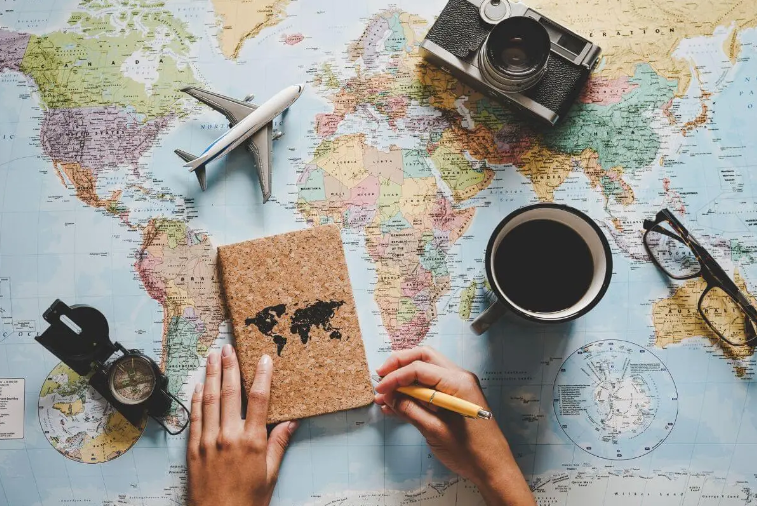

Importação das bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Importação do banco de dados

In [ ]:
viajantes_globais = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projetos GitHub/Explorando Viajantes Globais/Travel details dataset.csv")

Visualizar os 5 primeiros valores desse banco de dados

In [ ]:
viajantes_globais.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


Ler os tipos das variáveis de cada coluna:

*   Há 3 tipos: valores inteiros, flutuantes e objetos



In [ ]:
viajantes_globais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


Ver o tamanho do banco de dados:

In [ ]:
nLinhas, nColunas = viajantes_globais.shape
print(f'O banco de dados possui {nLinhas} linhas e {nColunas} colunas')

O banco de dados possui 139 linhas e 13 colunas


Analisar se possui valores duplicados e/ou nulos e remover as linhas com ausencia de dados.

In [ ]:
viajantes_globais.duplicated().sum()

0

In [ ]:
viajantes_globais.isnull().sum()

,0
Trip ID,0
Destination,2
Start date,2
End date,2
Duration (days),2
Traveler name,2
Traveler age,2
Traveler gender,2
Traveler nationality,2
Accommodation type,2


In [ ]:
viajantes_globais = viajantes_globais.dropna(subset=['Transportation type'], how='any')

In [ ]:
viajantes_globais.isnull().sum()

,0
Trip ID,0
Destination,0
Start date,0
End date,0
Duration (days),0
Traveler name,0
Traveler age,0
Traveler gender,0
Traveler nationality,0
Accommodation type,0


Realizar ajustes no banco de dados para garantir uma visualização mais precisa dos dados.

In [ ]:
viajantes_globais['Transportation type'].replace({"Flight": "Plane", "Airplane": "Plane"})

,Transportation type
0,Plane
1,Plane
2,Plane
3,Plane
4,Train
...,...
134,Car
135,Plane
136,Train
137,Plane


Mudar o tipo de duas colunas que estão no tipo objeto e transformar para flutuante

In [ ]:
viajantes_globais['Accommodation cost'].unique()

array(['1200', '800', '1000', '2000', '700', '1500', '500', '900', '2500',
       '3000', '1400', '600', '$900 ', '$1,500 ', '$1,200 ', '$600 ',
       '$1,000 ', '$700 ', '$400 ', '$1,400 ', '$2,000 ', '$1,100 ',
       '$800 ', '$200 ', '$150 ', '$500 ', '$180 ', '$350 ', '2200',
       '400', '1100', '300', '1300', '1800', '500 USD', '1000 USD',
       '800 USD', '1200 USD', '400 USD', '600 USD', '900 USD', '1500 USD',
       '700 USD', '300 USD', '200 USD', '$300 ', '200', '5000', '7000',
       '6000', '4000', '8000'], dtype=object)

In [ ]:
viajantes_globais['Accommodation cost'] = viajantes_globais['Accommodation cost'].str.replace('$', '').str.strip()
viajantes_globais['Accommodation cost'] = viajantes_globais['Accommodation cost'].str.replace(',', '').str.strip()
viajantes_globais['Accommodation cost'] = viajantes_globais['Accommodation cost'].str.replace('USD', '').str.strip()
viajantes_globais['Accommodation cost'] = viajantes_globais['Accommodation cost'].astype(float)

In [ ]:
viajantes_globais['Transportation cost'].unique()

array(['600', '500', '700', '1000', '200', '800', '1200', '100', '400',
       '150', '$400 ', '$700 ', '$150 ', '$800 ', '$100 ', '$600 ',
       '$80 ', '$500 ', '$300 ', '$50 ', '$120 ', '$75 ', '900', '50',
       '$200 ', '$250 ', '$20 ', '300', '800 USD', '200 USD', '500 USD',
       '700 USD', '300 USD', '600 USD', '400 USD', '1000 USD', '100 USD',
       '350 USD', '150 USD', '$1,200 ', '$900 ', '$1,500 ', '$1,000 ',
       '250', '2500', '1500', '2000', '3000'], dtype=object)

In [ ]:
viajantes_globais['Transportation cost'] = viajantes_globais['Transportation cost'].str.replace('$', '').str.strip()
viajantes_globais['Transportation cost'] = viajantes_globais['Transportation cost'].str.replace(',', '').str.strip()
viajantes_globais['Transportation cost'] = viajantes_globais['Transportation cost'].str.replace('USD', '').str.strip()
viajantes_globais['Transportation cost'] = viajantes_globais['Transportation cost'].astype(float)

Coluna de idade dos viajantes deixar como valores inteiros

In [ ]:
viajantes_globais['Traveler age'] = viajantes_globais['Traveler age'].astype(int)

In [ ]:
viajantes_globais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               136 non-null    int64  
 1   Destination           136 non-null    object 
 2   Start date            136 non-null    object 
 3   End date              136 non-null    object 
 4   Duration (days)       136 non-null    float64
 5   Traveler name         136 non-null    object 
 6   Traveler age          136 non-null    int64  
 7   Traveler gender       136 non-null    object 
 8   Traveler nationality  136 non-null    object 
 9   Accommodation type    136 non-null    object 
 10  Accommodation cost    136 non-null    float64
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 14.9+ KB


Separar a coluna de destino em outras duas, sendo uma coluna para a cidade e outra para o país.

In [ ]:
viajantes_globais[['Cidade','País']] = viajantes_globais['Destination'].str.split(', ', expand=True)
print(viajantes_globais.columns)

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost', 'Cidade', 'País'],
      dtype='object')


In [ ]:
print(viajantes_globais["Cidade"].head())

0      London
1      Phuket
2        Bali
3    New York
4       Tokyo
Name: Cidade, dtype: object


In [ ]:
print(viajantes_globais["País"].head())

0           UK
1     Thailand
2    Indonesia
3          USA
4        Japan
Name: País, dtype: object


Remover a coluna de ID da viagem

In [ ]:
viajantes_globais = viajantes_globais.drop(columns='Trip ID')

Traduzir e renomear todas as colunas

In [ ]:
viajantes_globais = viajantes_globais.rename(columns={
    'Destination': 'Destino',
    'Start date': 'Data início',
    'End date': 'Data término',
    'Duration (days)': 'Duração (dias)',
    'Traveler name': "Nome Viajante",
    'Traveler age': "Idade Viajante",
    'Traveler gender' : "Gênero Viajante",
    'Traveler nationality': 'Nacionalidade Viajante',
    'Accommodation type': "Tipo Acomodação",
    'Accommodation cost': "Custo acomodação",
    'Transportation type': "Tipo Transporte",
    'Transportation cost': "Custo Transporte"
})
viajantes_globais.columns

Index(['Destino', 'Data início', 'Data término', 'Duração (dias)',
       'Nome Viajante', 'Idade Viajante', 'Gênero Viajante',
       'Nacionalidade Viajante', 'Tipo Acomodação', 'Custo acomodação',
       'Tipo Transporte', 'Custo Transporte', 'Cidade', 'País'],
      dtype='object')

Analisar alguns dados estatísticos dos dados numéricos

In [ ]:
viajantes_globais.describe()

,Duração (dias),Idade Viajante,Custo acomodação,Custo Transporte
count,136.000000,136.000000,136.000000,136.000000
mean,7.610294,33.117647,1253.529412,645.183824
std,1.606343,7.139933,1338.644162,584.476153
min,5.000000,20.000000,150.000000,20.000000
25%,7.000000,28.000000,600.000000,200.000000
50%,7.000000,31.000000,900.000000,550.000000
75%,8.000000,37.250000,1200.000000,800.000000
max,14.000000,60.000000,8000.000000,3000.000000


Criar uma coluna com a soma do custo de acomodação e do transporte.

In [ ]:
viajantes_globais["Custo Total"] = viajantes_globais["Custo acomodação"] + viajantes_globais["Custo Transporte"]
viajantes_globais[["Custo acomodação", "Custo Transporte", "Custo Total"]]

,Custo acomodação,Custo Transporte,Custo Total
0,1200.0,600.0,1800.0
1,800.0,500.0,1300.0
2,1000.0,700.0,1700.0
3,2000.0,1000.0,3000.0
4,700.0,200.0,900.0
...,...,...,...
134,2500.0,2000.0,4500.0
135,5000.0,3000.0,8000.0
136,2000.0,1000.0,3000.0
137,6000.0,2500.0,8500.0


Analisar cada coluna e suas frequências que mais ocorrem.

Cidade
Paris             14
Bali              12
Tokyo             12
Sydney            12
New York           8
Bangkok            8
Rome               8
London             7
Barcelona          6
Rio de Janeiro     5
Name: count, dtype: int64


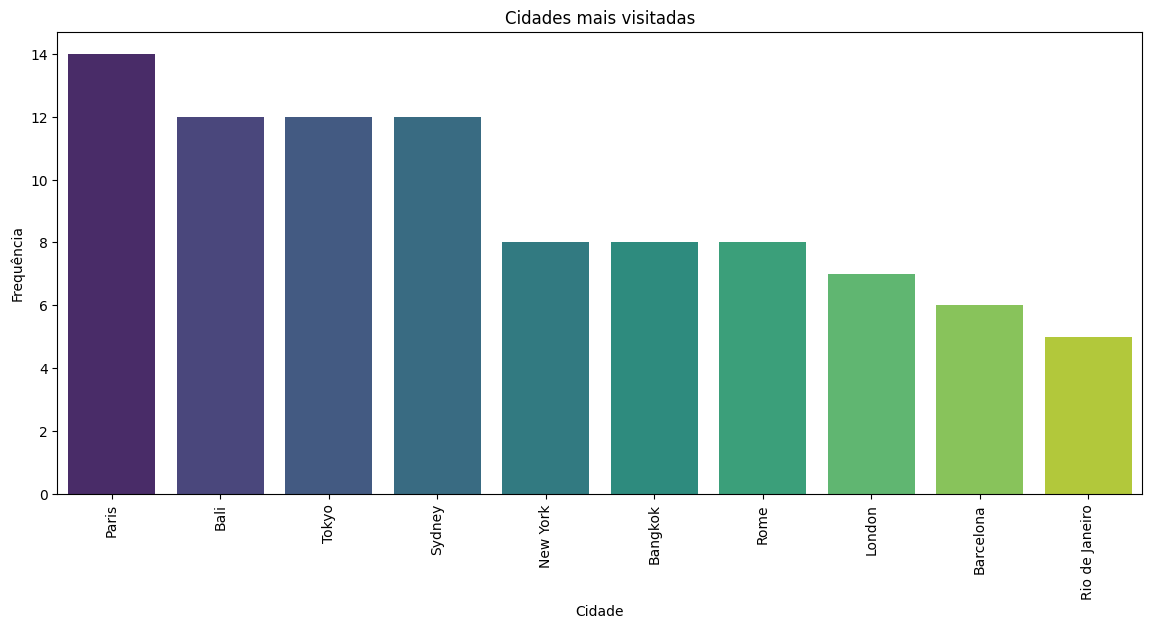

In [ ]:
print(viajantes_globais['Cidade'].value_counts().head(10))

cidade_ordenado = viajantes_globais['Cidade'].value_counts().head(10)
cidade_ordenado = cidade_ordenado.reset_index()
cidade_ordenado.columns = ['Cidade', 'Frequência']

plt.figure(figsize=(14, 6))
sns.barplot(data=cidade_ordenado, x='Cidade', y='Frequência', palette="viridis", hue='Cidade')
plt.xticks(rotation=90)
plt.title("Cidades mais visitadas")
plt.xticks(rotation=90)
plt.show()

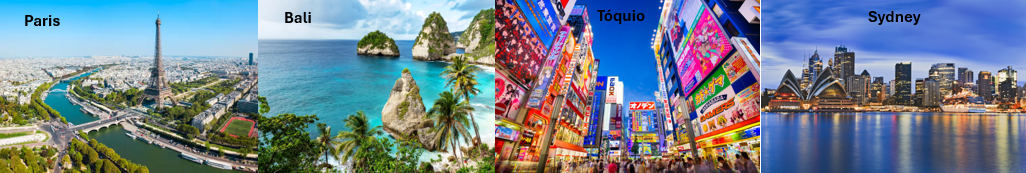

In [ ]:
viajantes_globais['Duração (dias)'].value_counts().head(6)

,count
Duração (dias),
7.0,53
8.0,24
9.0,16
6.0,16
5.0,10
10.0,10


Segundo o IBGE (Instituto Brasileiro de Geografia e Estatística), a classificação das faixas etárias no Brasil ocorre da seguinte maneira: jovem, do nascimento até aos 19 anos de idade; adulto, a população que possui idade entre 20 e 59 anos; idoso, as pessoas com 60 anos em diante

        Quantidade
Adulto         135
Idoso            1


33.1 é a média de idade dos viajantes
31.0 é a mediana de idade dos viajantes




<Figure size 900x600 with 0 Axes>

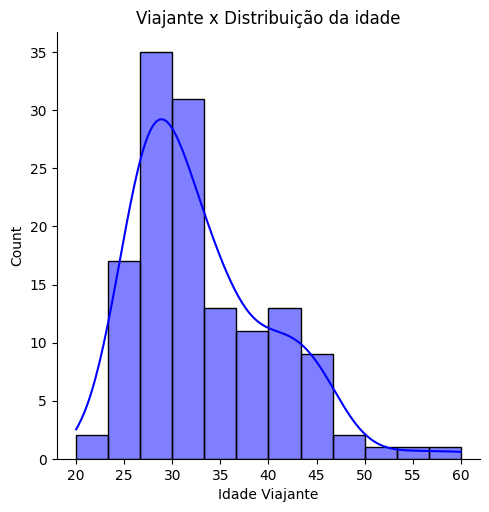

In [ ]:
adulto = range(20, 60)
idoso = range(60, 100)

list_adulto = []
list_idoso = []

for idade in viajantes_globais['Idade Viajante']:
  if idade in adulto:
    list_adulto.append(idade)
  else:
    list_idoso.append(idade)

tabela_idade = pd.DataFrame({'Adulto': [len(list_adulto)], 'Idoso': [len(list_idoso)]})
tabela_idade = tabela_idade.transpose()
tabela_idade.columns = ['Quantidade']
print(tabela_idade.sort_values(by='Quantidade', ascending=False))

print("\n")
media = viajantes_globais['Idade Viajante'].mean()
mediana = viajantes_globais["Idade Viajante"].median()
print(f'{round(media,1)} é a média de idade dos viajantes')
print(f'{mediana} é a mediana de idade dos viajantes')

print("\n")
plt.figure(figsize=(9,6))
sns.displot(x=viajantes_globais['Idade Viajante'], kde=True, color="blue");
plt.xlabel('Idade Viajante')
plt.title('Viajante x Distribuição da idade')
sns.despine();

In [ ]:
viajantes_globais['Gênero Viajante'].value_counts()

,count
Gênero Viajante,
Female,70
Male,66


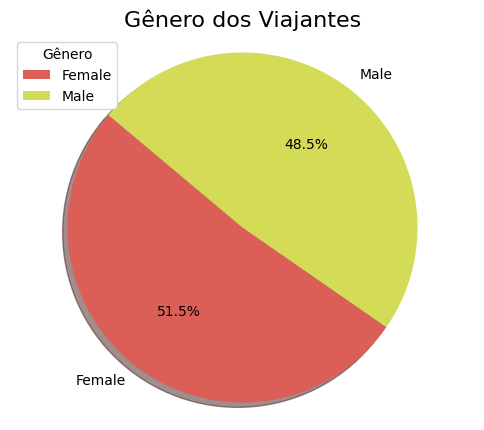

In [ ]:
plt.figure(figsize=(6, 5))
plt.pie(viajantes_globais['Gênero Viajante'].value_counts().values, labels=viajantes_globais['Gênero Viajante'].value_counts().index,
        colors=sns.color_palette("hls"), autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Gênero dos Viajantes', fontsize=16)
plt.axis('equal')
plt.legend(title="Gênero", loc="upper left")
plt.show()

In [ ]:
viajantes_globais['Nacionalidade Viajante'].value_counts().head()

,count
Nacionalidade Viajante,
American,23
Korean,13
British,12
Canadian,9
Australian,8


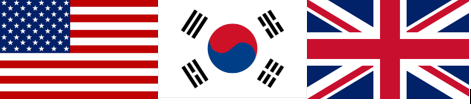

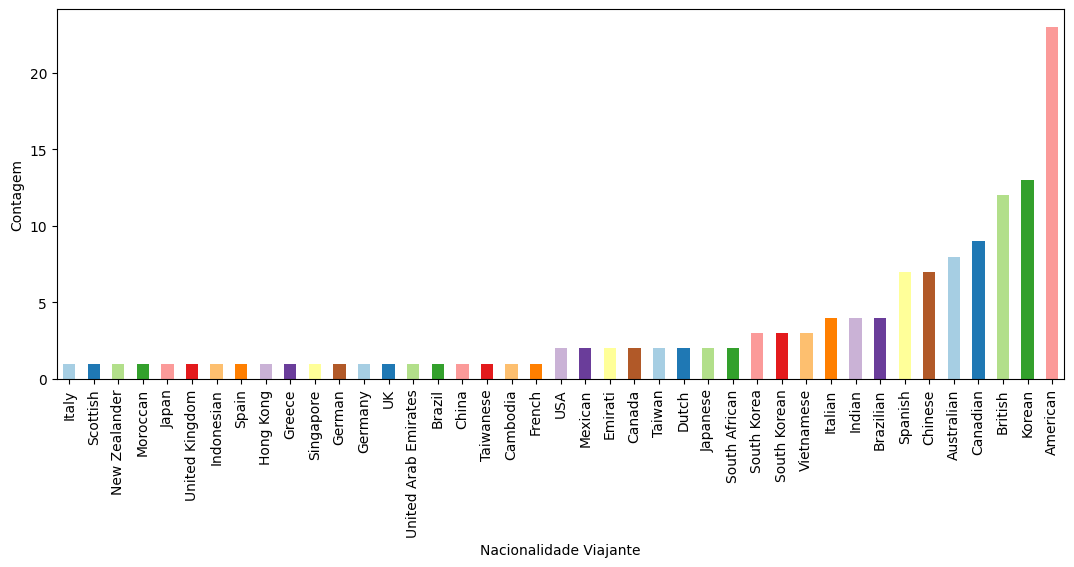

In [ ]:
f = plt.figure()
viajantes_globais.groupby("Nacionalidade Viajante").size().sort_values().plot(kind = "bar" , color = sns.color_palette('Paired'))
f.set_figwidth(13)
plt.xlabel("Nacionalidade Viajante")
plt.ylabel("Contagem")
plt.show()

In [ ]:
colors = {'Female': 'red', 'Male': 'blue'}
fig = px.bar(viajantes_globais, x='Nacionalidade Viajante', y='Duração (dias)', color='Gênero Viajante', barmode='stack')
fig.update_layout(title='Duração da viagem x nacionalidade e gênero')
fig.show()

   Tipo Acomodação  Frequência
0            Hotel          59
1           Airbnb          30
2           Hostel          24
3           Resort          14
4            Villa           4
5  Vacation rental           3
6             Riad           1
7       Guesthouse           1




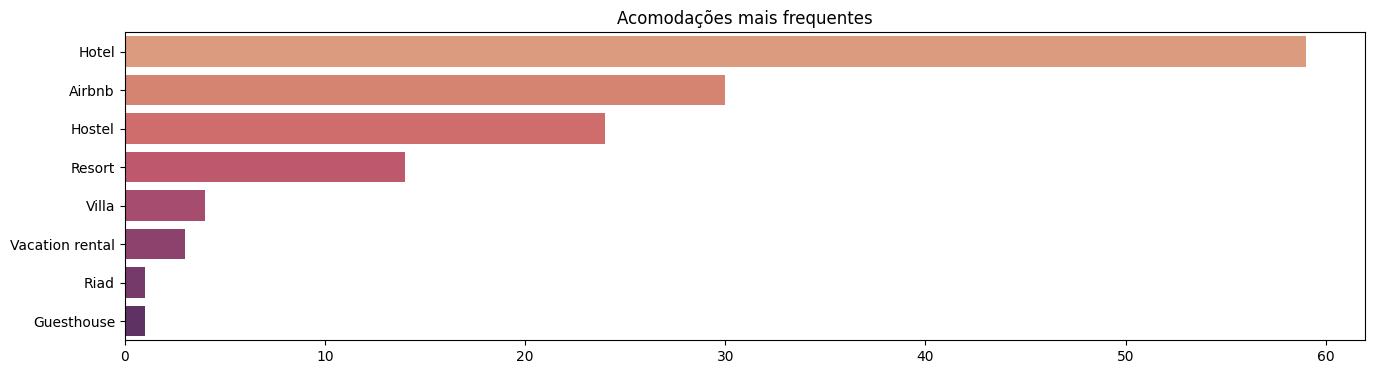

In [ ]:
acomodacao_ordenado = viajantes_globais['Tipo Acomodação'].value_counts().sort_values(ascending=False)
acomodacao_ordenado = acomodacao_ordenado.reset_index()
acomodacao_ordenado.columns = ['Tipo Acomodação', 'Frequência']
print(acomodacao_ordenado)
print("\n")

plt.figure(figsize=(16, 4))
sns.barplot(data=acomodacao_ordenado,orient='h', x='Frequência', y='Tipo Acomodação', palette="flare", hue="Tipo Acomodação", order=acomodacao_ordenado['Tipo Acomodação'])
plt.xlabel("")
plt.ylabel("")
plt.title("Acomodações mais frequentes")
plt.show()

O custo de acomodação naão segue um padrão, isso pode ser visto pelo seu alto valor de desvio padrão.

In [ ]:
viajantes_globais['Custo acomodação'].describe()

,Custo acomodação
count,136.000000
mean,1253.529412
std,1338.644162
min,150.000000
25%,600.000000
50%,900.000000
75%,1200.000000
max,8000.000000


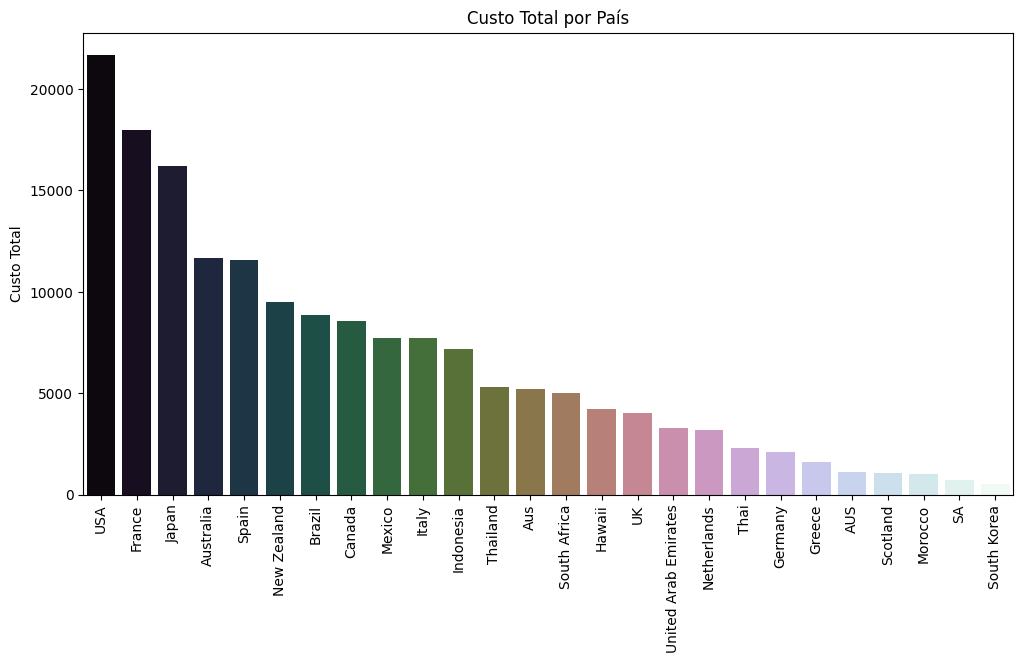

In [ ]:
custo_pais = viajantes_globais.groupby('País')['Custo Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=custo_pais.index, y=custo_pais.values, palette="cubehelix", hue=custo_pais.index)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Custo Total")
plt.title("Custo Total por País")
plt.xticks(rotation=90)
plt.show()

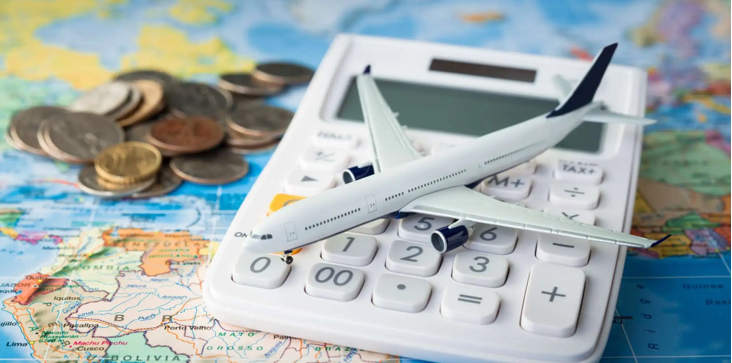

Tipo Transporte
Plane         57
Train         37
Flight        13
Car rental    13
Bus            6
Name: count, dtype: int64




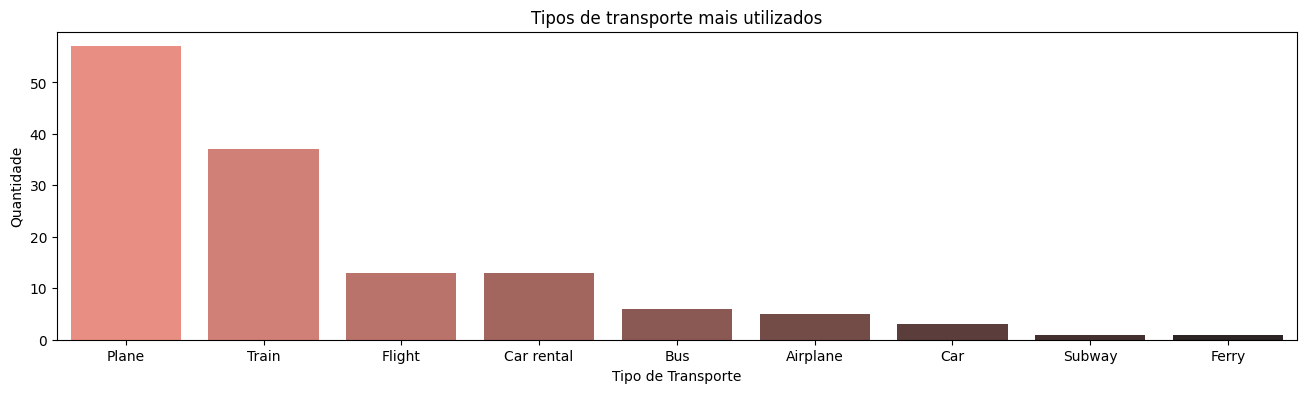

In [ ]:
print(viajantes_globais['Tipo Transporte'].value_counts().head())
print("\n")
transporte_ordenado = viajantes_globais['Tipo Transporte'].value_counts().sort_values(ascending=False)
transporte_ordenado = transporte_ordenado.reset_index()
transporte_ordenado.columns = ['Tipo Transporte', 'Frequência']

plt.figure(figsize=(16, 4))
sns.barplot(data=transporte_ordenado, x='Tipo Transporte', y='Frequência', palette="dark:salmon_r", hue='Tipo Transporte', order=transporte_ordenado['Tipo Transporte'])
plt.xlabel("Tipo de Transporte")
plt.ylabel("Quantidade")
plt.title("Tipos de transporte mais utilizados")
plt.show()


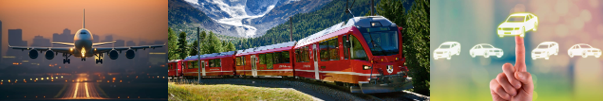

O custo de transporte não segue um padrão, pela dados é possivel prever que os dados possuem varios outliers.

In [ ]:
viajantes_globais['Custo Transporte'].describe()

,Custo Transporte
count,136.000000
mean,645.183824
std,584.476153
min,20.000000
25%,200.000000
50%,550.000000
75%,800.000000
max,3000.000000


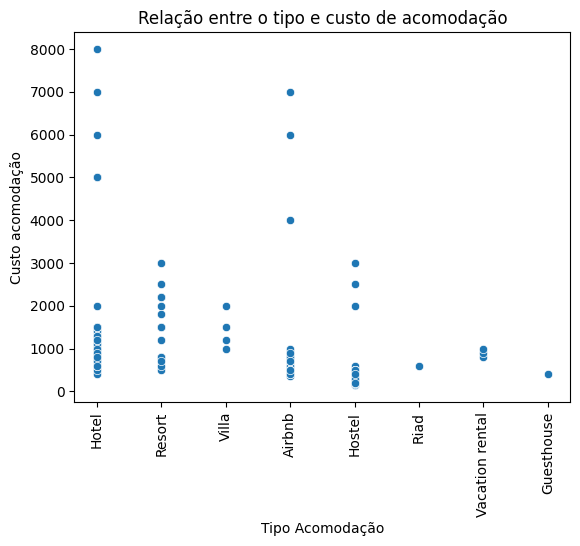

In [ ]:
sns.scatterplot(data=viajantes_globais, x="Tipo Acomodação", y="Custo acomodação", legend=False)
plt.xticks(rotation=90)
plt.title("Relação entre o tipo e custo de acomodação")
plt.show()